# Exploratory Data Analysis

### Importing libreries

In [1]:
import pandas as pd
import numpy as np
# To work with json
import json
# for encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

# Visualization libraries
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# To do exploratory data analysis
import seaborn as sns
from wordcloud import WordCloud

# Stile for plots
plt.style.use('ggplot')

### Loading the data set

In [2]:
# to import the data from the json file to a dataframe
with open ('/home/bbruno/all_here/python course/vinnie/data/users-data-prod.json', 'r') as file:
    data = json.load(file)

df = pd.json_normalize(data['usersData'])
df.columns

Index(['userId', 'wines', 'tastingNotes', 'pairings'], dtype='object')

### Data understanding

In [3]:
print(f"1. the data set is compoused of {df.shape[0]} rows and {df.shape[1]} columns\n") #this is df.shape
print(f"2. the data set if of type {type(df)}\n")
print(f"3. the columns are of type \n{df.dtypes}")

1. the data set is compoused of 4504 rows and 4 columns

2. the data set if of type <class 'pandas.core.frame.DataFrame'>

3. the columns are of type 
userId          object
wines           object
tastingNotes    object
pairings        object
dtype: object


## Data preparation

* In this section we would have the data preparation based on the feedback of the wines: This feedback is provided by the users when they try a given wine and they rather liked or not based in a numerical rate from 0 to 5 stars

In [4]:
wines = []
for user_data in data['usersData']:
    for wine in user_data['wines']:
        #for grape in wine['grapes']:
        for tasteNoteid in wine['tasteNoteIds']:
            wines.append({
                'userId': user_data['userId'],
                'wine': wine['name'],
                'wineId': wine['id'],
                'color': wine['color'],
                
                'grapes': wine['grapes'],
                #'grapes': grapes,
                'appellation': wine['appellation'],
                'category': wine['category'],
                #'tasteNoteid': wine['tasteNoteIds'],
                'tastingNoteIds': tasteNoteid
            })

wines_df = pd.DataFrame(wines)
wines_df['grapes'] = wines_df['grapes'].apply(str)
wines_df['grapes'] = wines_df['grapes'].str.replace('\[', '', regex=True)
wines_df['grapes'] = wines_df['grapes'].str.replace('\]', '', regex=True)
wines_df['grapes'] = wines_df['grapes'].str.replace("'", "")
wines_df['grapes'] = wines_df['grapes'].replace('', np.nan)
wines_df = wines_df.replace('None', np.nan)
print(wines_df.shape)
wines_df

(1271, 8)


,userId,wine,wineId,color,grapes,appellation,category,tastingNoteIds
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,6V7XZnXSK2LYF9jzI7LR,Red,Barbera,Emilia-Romagna,MediumRed,roCWZ72rDDLT6Q5Mcc7m
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,bINBmCq7FXjVXt1sj6f8,Red,Shiraz/Syrah,South Eastern Australia,BoldRed,XJ60d8BLy1YOzcr7no1J
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,ckVI0IUPCHuhT00plzm2,Red,Pinot Noir,Sonoma Coast,LightRed,4Buw0MdNDOZ4tCSRw88d
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,3s8PZXoVIaInrJqMbxs5,White,Timorasso,Colli Tortonesi,None,UUpZSMTF7VZVDPX17pgw
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,B1VJSCml6AZ47Hf8SpEu,Red,"Cabernet Sauvignon, Sangiovese",Toscana,None,DCTkjJunOye0y3nrg8ul
...,...,...,...,...,...,...,...,...
1266,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,bPkjkqyHCazKNY1YBN8N,White,Albariño,Rías Baixas,LightWhite,vbInbkGi5vgFpJw7uO3o
1267,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Piceno Bacchus,waRUqzj7zJFnvZE6ZzlA,Red,"Pinot Noir, Sangiovese, Montepulciano",Rosso Piceno,None,OC1bFth3SPBkFNRKIvW5
1268,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,y1CVSKNcIV3reYGh00YA,White,Albariño,Rías Baixas,LightWhite,TN52mXAU59Bb1dppnVa7
1269,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,y1CVSKNcIV3reYGh00YA,White,Albariño,Rías Baixas,LightWhite,sMkSAMC1wkpEcdypKDbR


In [5]:
# From the tastingNotes list takes
tastingNotes = []
for user_data in data['usersData']:
    for tastingNote in user_data['tastingNotes']:
        #for aroma in tastingNote['aromaKeys']:

        tastingNotes.append({

            'id': tastingNote['id'], #this is the same 
            'wineId': tastingNote['wineId'],
            'rate': tastingNote['rate'],  
            'aromaKeys': tastingNote['aromaKeys'],
            'sweetness': tastingNote['sweetness'],
            'body': tastingNote['body'],
            'intensity': tastingNote['intensity'],
            'acidity': tastingNote['acidity'],
            'depth': tastingNote['depth'],
            'clarity': tastingNote['clarity'],
            'vintage': tastingNote['vintage'],
            'hue': tastingNote['hue'],
            'tannins': tastingNote['tannins']
    })

tastingNotes_df = pd.DataFrame(tastingNotes)

tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].apply(str)
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].str.replace('\[', '', regex=True)
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].str.replace('\]', '', regex=True)
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].str.replace("'", "")
#remove the word aroma at the beginning of each word
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].str.replace("aroma-", "")
# add 0 to the vintage column where there is no value
tastingNotes_df['vintage'] = tastingNotes_df['vintage'].fillna(0)
tastingNotes_df = tastingNotes_df.astype({'vintage': 'int'})
# replace the 0 with null
tastingNotes_df['vintage'] = tastingNotes_df['vintage'].replace(0, np.nan)
# replace the empty strings with null
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].replace('', np.nan)

# replace the None with null
tastingNotes_df = tastingNotes_df.replace('None', np.nan)

tastingNotes_df

,id,wineId,rate,aromaKeys,sweetness,body,intensity,acidity,depth,clarity,vintage,hue,tannins
0,roCWZ72rDDLT6Q5Mcc7m,6V7XZnXSK2LYF9jzI7LR,5,NaN,Medium Sweet,Full Bodied,Aromatic,Crisp,Dark,Clear,2020.0,Purplish,Not Present
1,4Buw0MdNDOZ4tCSRw88d,ckVI0IUPCHuhT00plzm2,3,"red-cherry, lime, saffron, cinnamon, vinegar, ...",Dry,Light,Moderate,Crisp,Medium,Clear,2021.0,Ruby,Round
2,XJ60d8BLy1YOzcr7no1J,bINBmCq7FXjVXt1sj6f8,2,"red-cherry, grape, tomato, tea, cream",Medium Sweet,Very Light,Low,Crisp,Pale,Clear,2021.0,Ruby,Soft
3,6IZXzo1sW9nfRKqTwjyE,HlIyRipAHSVlgbS0v5U4,5,"plum, cherry, black-cherry, pepper",Dry,Medium Full,Aromatic,Fresh,Medium,Slight Haze,2019.0,Ruby,Soft
4,DCTkjJunOye0y3nrg8ul,B1VJSCml6AZ47Hf8SpEu,4,"cherry, strawberry, blackberry, olive",Dry,Medium Full,Aromatic,Fresh,Medium,Slight Haze,2011.0,Purplish,Round
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,TYm9LrS9xTWKydT7sagy,BDh13yLzIHRkUoWTf3G1,4,"orange, lemon, green-tea",Dry,Light,Aromatic,Crisp,None,Slight Haze,2016.0,Gold,None
1286,Uvn6Tc35fswkLuXxDpjW,RfoyWKd0DiwubO2FljfW,None,NaN,None,None,None,Fresh,None,Slight Haze,NaN,None,Dry Tannins
1287,nURhuPeJ7wQtg0eTyWki,aiYJGI8M8ka2U6vKawuB,4,NaN,None,None,None,None,None,Slight Haze,NaN,Gold,None
1288,sMkSAMC1wkpEcdypKDbR,y1CVSKNcIV3reYGh00YA,None,NaN,None,None,None,Flabby,None,None,NaN,None,None


## Merging

In [6]:
merged_df = pd.merge(wines_df, tastingNotes_df, left_on='tastingNoteIds', right_on='id')
#show all the columns
pd.set_option('display.max_columns', None)

#print the columns 
print(merged_df.columns)
print(merged_df.head(5))

Index(['userId', 'wine', 'wineId_x', 'color', 'grapes', 'appellation',
       'category', 'tastingNoteIds', 'id', 'wineId_y', 'rate', 'aromaKeys',
       'sweetness', 'body', 'intensity', 'acidity', 'depth', 'clarity',
       'vintage', 'hue', 'tannins'],
      dtype='object')
                                 userId                       wine  \
0  826c6abe-7147-4b69-aaea-275fe65b033a  Cavalcaonte Barbera Forlí   
1  d838a526-4b0a-4fad-b54f-90b6ca321fca                     Shiraz   
2  d838a526-4b0a-4fad-b54f-90b6ca321fca                 Pinot Noir   
3  bec96c0b-5b0b-4992-8756-e0d3b704afb5                  Timorasso   
4  bec96c0b-5b0b-4992-8756-e0d3b704afb5                  Le Difese   

               wineId_x  color                          grapes  \
0  6V7XZnXSK2LYF9jzI7LR    Red                         Barbera   
1  bINBmCq7FXjVXt1sj6f8    Red                    Shiraz/Syrah   
2  ckVI0IUPCHuhT00plzm2    Red                      Pinot Noir   
3  3s8PZXoVIaInrJqMbxs5  White       

## Data cleaning

In [7]:
print(merged_df.info())
print(f"the data has the following colums with null values:\n{merged_df.isnull().sum()}")
# the only important column with null values is 'rate' which is the target variable

# Drop the rows with null values in the target variable
merged_df.dropna(subset=['rate'], inplace=True)
print(f"1. the number of null values in the column 'rate' after dropping are {merged_df['rate'].isnull().sum()}")

# Drop the columns that are not important for the analysis
merged_df.drop(['wineId_x', 'tastingNoteIds', 'id', 'wineId_y'], axis=1, inplace=True)
merged_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 0 to 1268
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userId          1269 non-null   object 
 1   wine            1269 non-null   object 
 2   wineId_x        1269 non-null   object 
 3   color           1269 non-null   object 
 4   grapes          959 non-null    object 
 5   appellation     832 non-null    object 
 6   category        575 non-null    object 
 7   tastingNoteIds  1269 non-null   object 
 8   id              1269 non-null   object 
 9   wineId_y        1269 non-null   object 
 10  rate            1008 non-null   object 
 11  aromaKeys       591 non-null    object 
 12  sweetness       994 non-null    object 
 13  body            966 non-null    object 
 14  intensity       1037 non-null   object 
 15  acidity         1010 non-null   object 
 16  depth           961 non-null    object 
 17  clarity         1025 non-null   o

,userId,wine,color,grapes,appellation,category,rate,aromaKeys,sweetness,body,intensity,acidity,depth,clarity,vintage,hue,tannins
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,Red,Barbera,Emilia-Romagna,MediumRed,5,NaN,Medium Sweet,Full Bodied,Aromatic,Crisp,Dark,Clear,2020.0,Purplish,Not Present
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,Red,Shiraz/Syrah,South Eastern Australia,BoldRed,2,"red-cherry, grape, tomato, tea, cream",Medium Sweet,Very Light,Low,Crisp,Pale,Clear,2021.0,Ruby,Soft
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,Red,Pinot Noir,Sonoma Coast,LightRed,3,"red-cherry, lime, saffron, cinnamon, vinegar, ...",Dry,Light,Moderate,Crisp,Medium,Clear,2021.0,Ruby,Round
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,White,Timorasso,Colli Tortonesi,None,5,"eucalyptus, thyme, flint, pepper, honey, dried...",Medium Sweet,Medium Full,Aromatic,Fresh,None,Clear,2019.0,Gold,Not Present
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,Red,"Cabernet Sauvignon, Sangiovese",Toscana,None,4,"cherry, strawberry, blackberry, olive",Dry,Medium Full,Aromatic,Fresh,Medium,Slight Haze,2011.0,Purplish,Round


In [8]:
print(merged_df.info())
print(f"1. the number of users in the data set is {merged_df['userId'].nunique()}\n")
print(f"2. the number of wines in the data set is {merged_df['wine'].nunique()}\n")
print(f"3. the total number of rates is {merged_df['rate'].count()}\n")
print(f"4. the type of rate was {merged_df['rate'].unique()}\n")
# mapping the rate to int only
merged_df['rate'] = merged_df['rate'].astype(int)
print(f"4. the type of rate is {merged_df['rate'].unique()}\n")
print(f"5. the top 10 wines with the most rates are:\n{merged_df['wine'].value_counts().head(10)}\n")
print(f"6. the number of rates per type are \n{merged_df['rate'].value_counts().sort_index()}\n")
print(f"7. the top 10 users with the most rates are:\n{merged_df['userId'].value_counts().head(10)}\n")
print(f"8. the rates per wines color are:\n{merged_df['color'].value_counts()}\n")
print(f"9. the percentage of users that perfer wines by colors:\n{merged_df['color'].value_counts(normalize=True)}\n")
# drop the null rows of grapes, appellations and categories
merged_df_gac = merged_df.dropna(subset=['grapes', 'appellation', 'category'])
print(f"10. the most populars appellations are:\n{merged_df_gac['appellation'].value_counts().head(10)}\n")
print(f"11. the most populars categories are:\n{merged_df_gac['category'].value_counts().head(10)}\n")
print(f"12. the most populars grapes are:\n{merged_df_gac['grapes'].value_counts().head(10)}\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1265
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       1008 non-null   object 
 1   wine         1008 non-null   object 
 2   color        1008 non-null   object 
 3   grapes       764 non-null    object 
 4   appellation  634 non-null    object 
 5   category     413 non-null    object 
 6   rate         1008 non-null   object 
 7   aromaKeys    459 non-null    object 
 8   sweetness    842 non-null    object 
 9   body         826 non-null    object 
 10  intensity    865 non-null    object 
 11  acidity      855 non-null    object 
 12  depth        806 non-null    object 
 13  clarity      851 non-null    object 
 14  vintage      706 non-null    float64
 15  hue          846 non-null    object 
 16  tannins      798 non-null    object 
dtypes: float64(1), object(16)
memory usage: 141.8+ KB
None
1. the number of users in the data 

* plot to check missing values


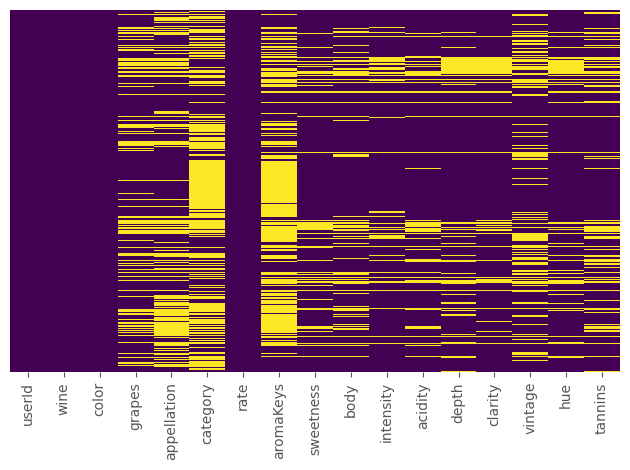

In [9]:
# Dataset has not missing values in important columns for analysis
sns.heatmap(merged_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
#save
plt.tight_layout()
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/heatmap2.png', dpi=300, bbox_inches='tight')

## Plots


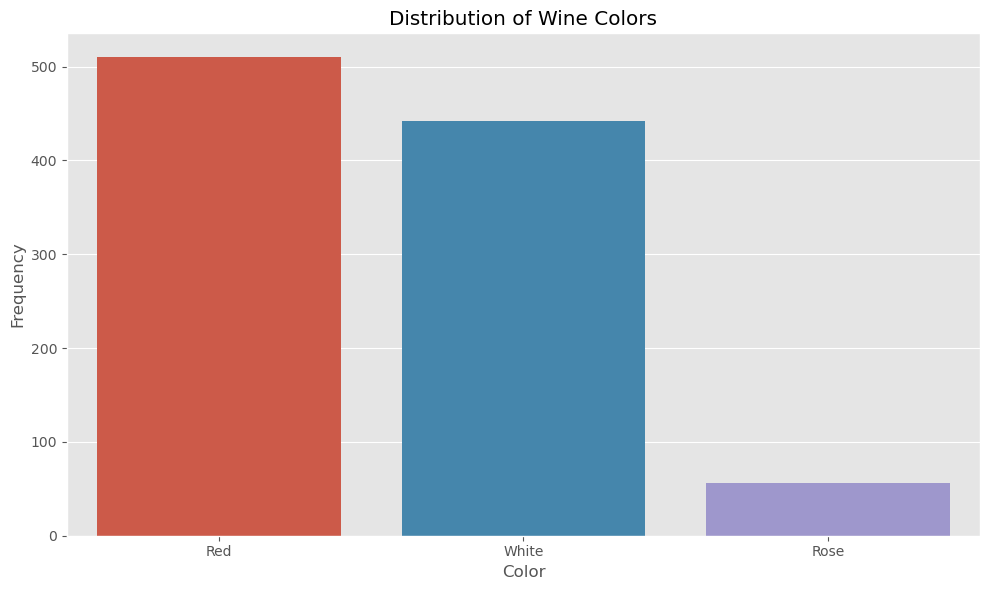

In [10]:
# Histogram of the colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='color', data=merged_df)
plt.title('Distribution of Wine Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/color.png')
plt.show()

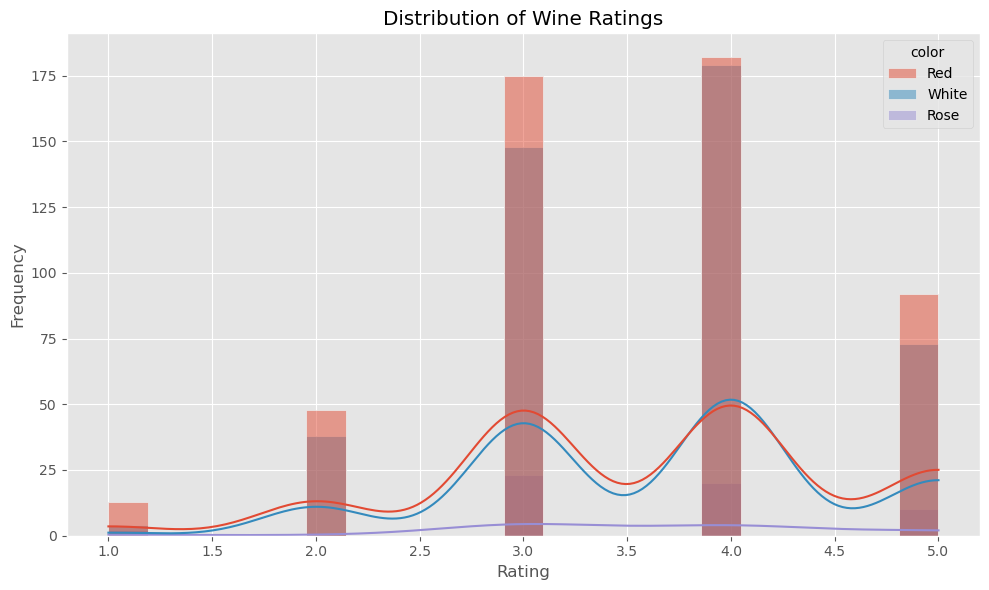

In [11]:
# Histogram of the rates by color
plt.figure(figsize=(10, 6))
ax = sns.histplot(x='rate', hue='color', data=merged_df, kde=True)
plt.title('Distribution of Wine Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/rate_by_color.png')
plt.show()

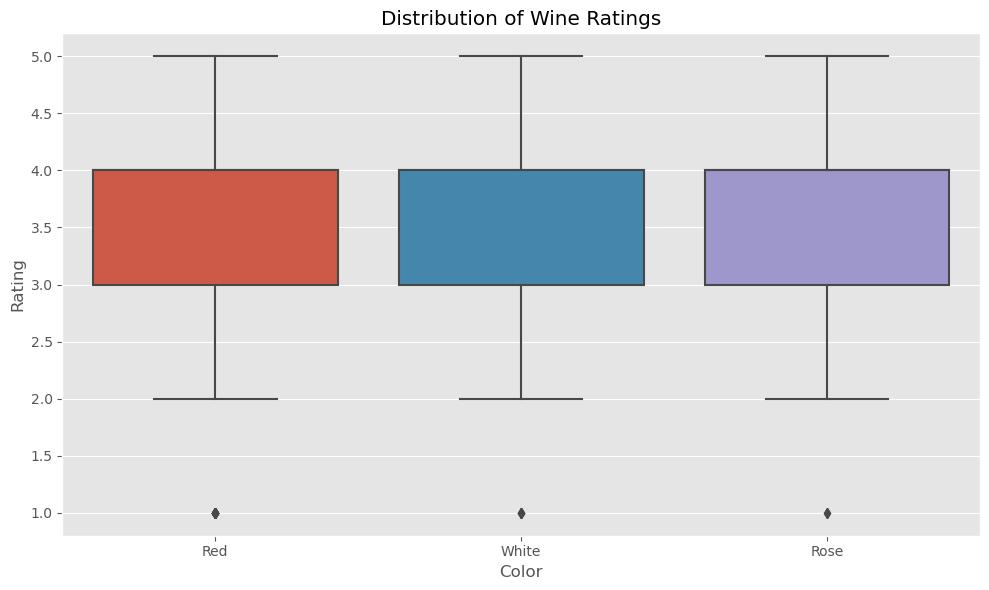

In [12]:
# Boxplot of the rates by color
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='color', y='rate', data=merged_df)
plt.title('Distribution of Wine Ratings')
plt.xlabel('Color')
plt.ylabel('Rating')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/boxplot.png')
plt.show()

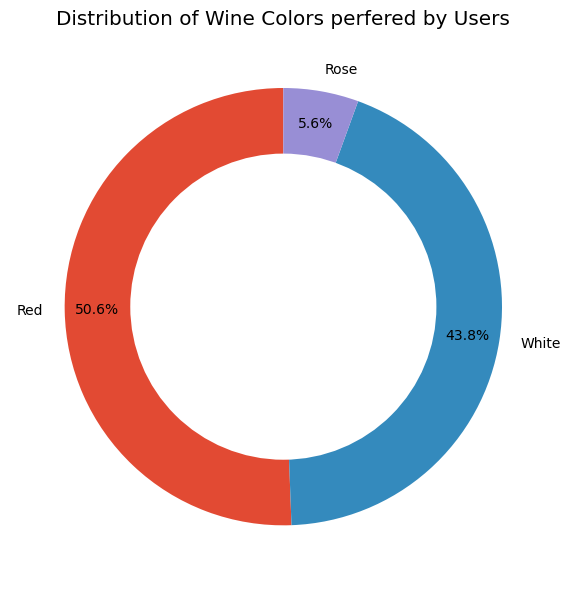

In [13]:
# Donut chart of users that prefer wines by color
plt.figure(figsize=(10, 6))
plt.pie(merged_df['color'].value_counts(), labels=merged_df['color'].value_counts().index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow=False)

# Draw a circle at the center
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Wine Colors perfered by Users')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/pie_chart.png')
plt.show()

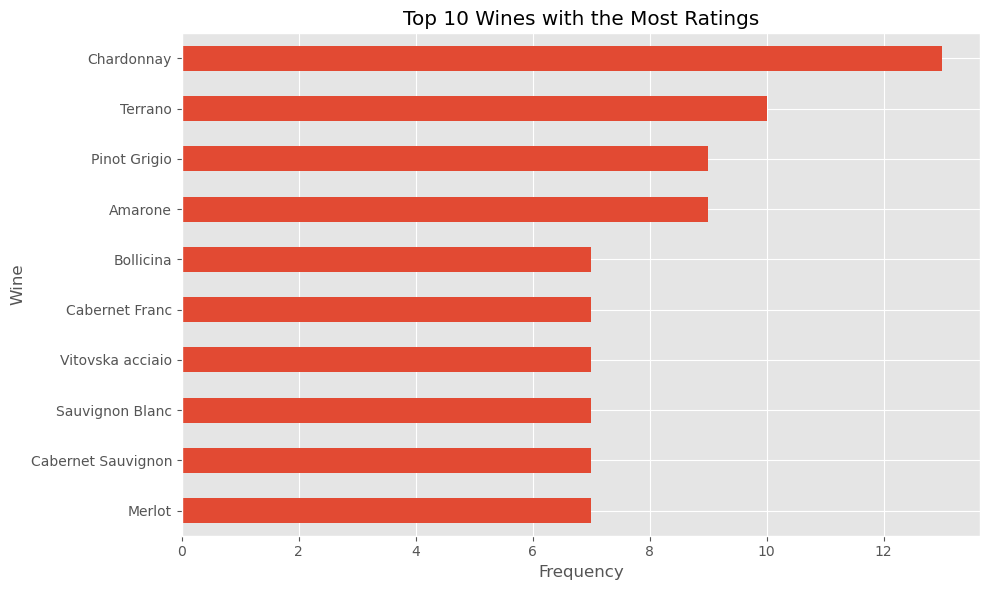

In [14]:
# Bar char of the top 10 wines with the most rates
plt.figure(figsize=(10, 6))
merged_df['wine'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Wines with the Most Ratings')
plt.xlabel('Frequency')
plt.ylabel('Wine')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/top10_wines.png')
plt.show()

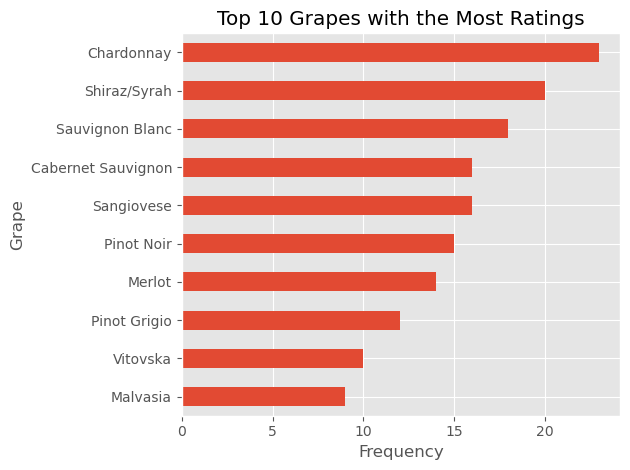

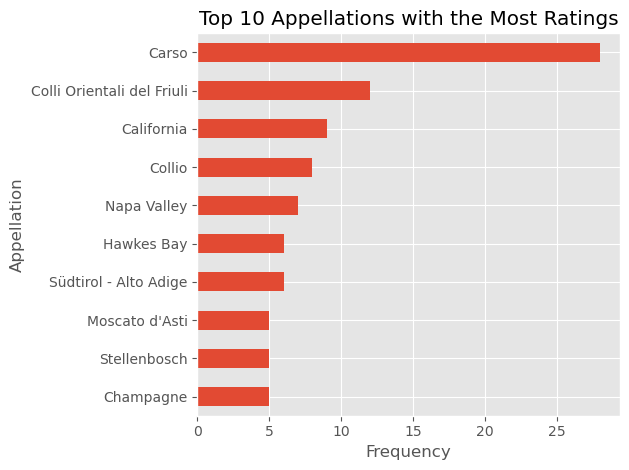

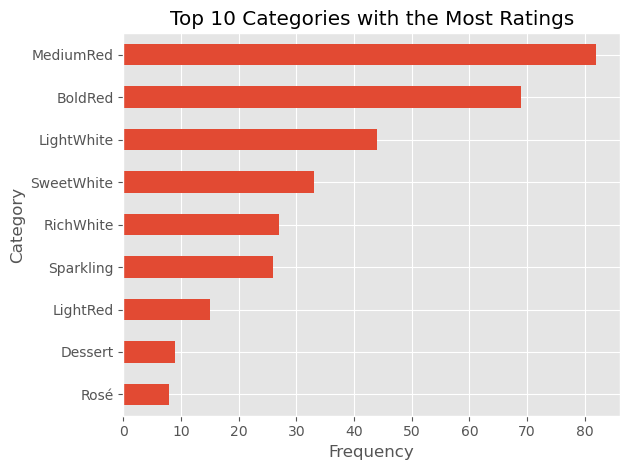

In [15]:
# 3 histograms of the 10 most populars grapes, appellations and categories
merged_df_gac['grapes'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Grapes with the Most Ratings')
plt.xlabel('Frequency')
plt.ylabel('Grape')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/grapes.png')
plt.show()
########
merged_df_gac['appellation'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Appellations with the Most Ratings')
plt.xlabel('Frequency')
plt.ylabel('Appellation')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/appellation.png')
plt.show()
########
merged_df_gac['category'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Categories with the Most Ratings')
plt.xlabel('Frequency')
plt.ylabel('Category')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/category.png')
plt.show()

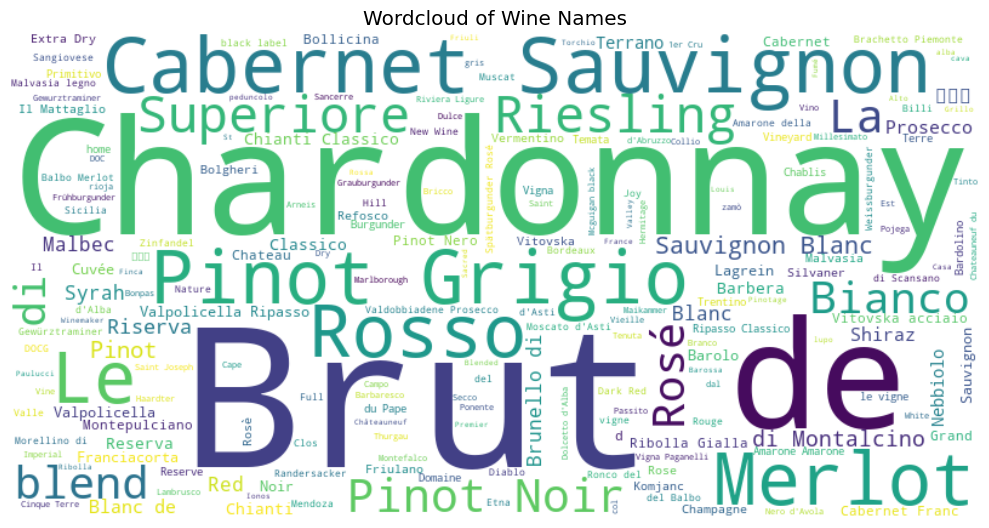

In [16]:
# define the words 
text = " ".join(review for review in merged_df['wine'])

# Wordcloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Wine Names')
plt.axis("off")
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/wordcloud.png')
plt.show()

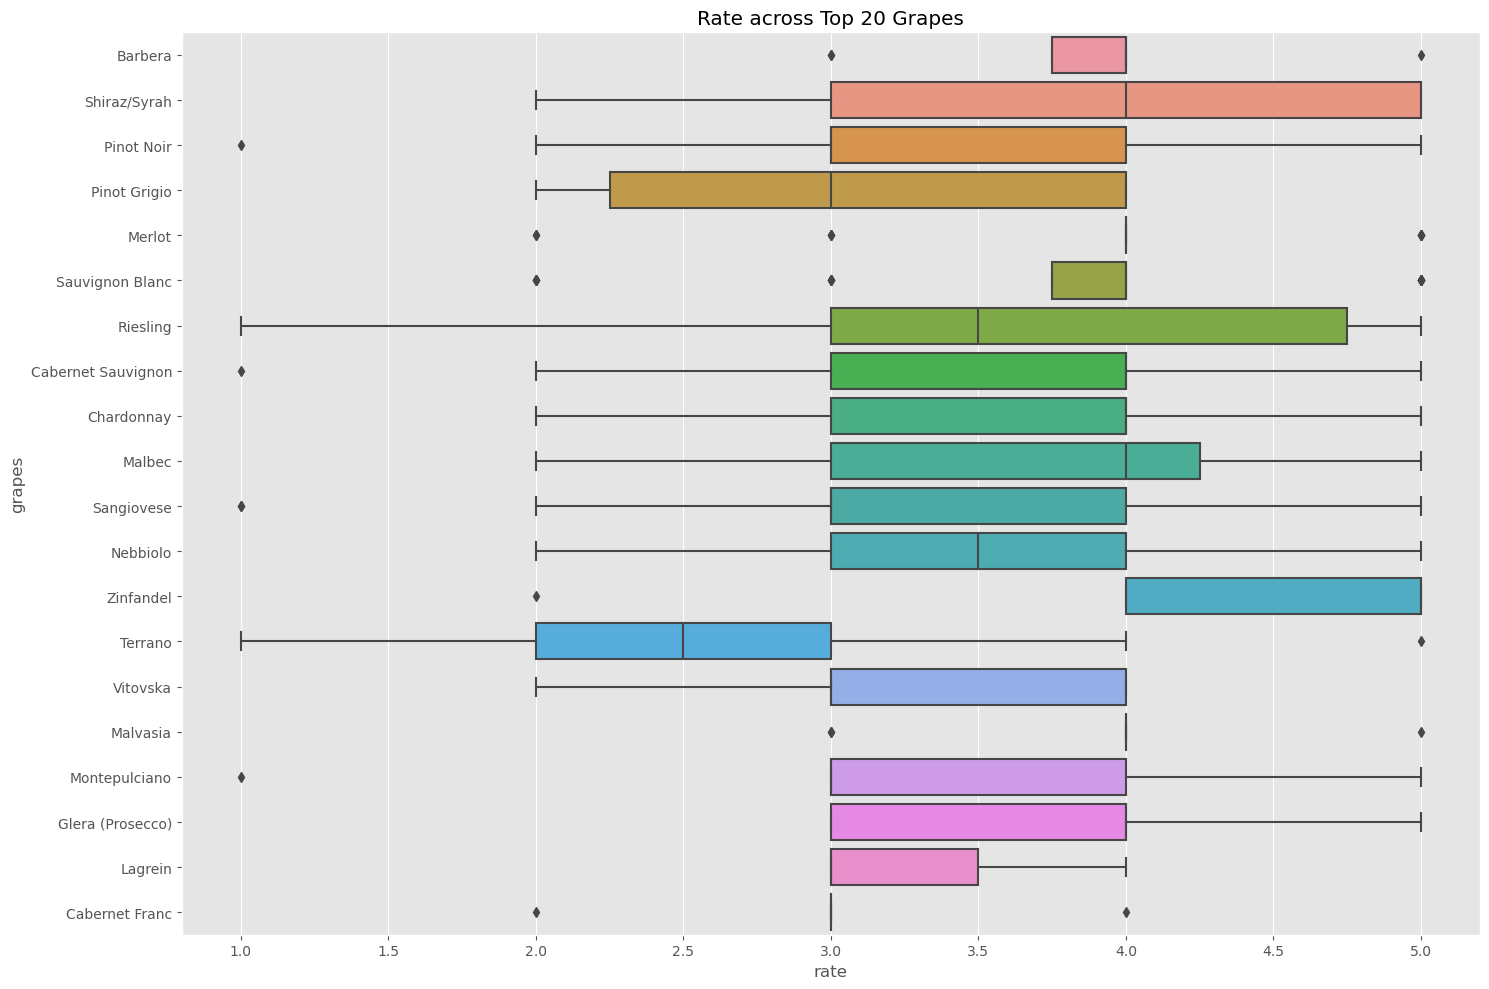

In [17]:
# Define the top 20 grapes
top_grapes = merged_df['grapes'].value_counts().index[:20].sort_values()

# Filter the DataFrame to include only these 'grapes'
df_top_grapes = merged_df[merged_df['grapes'].isin(top_grapes)]

# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='rate', y='grapes', data=df_top_grapes)
plt.title('Rate across Top 20 Grapes')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/rate_across_top_20_grapes.png')
plt.show()

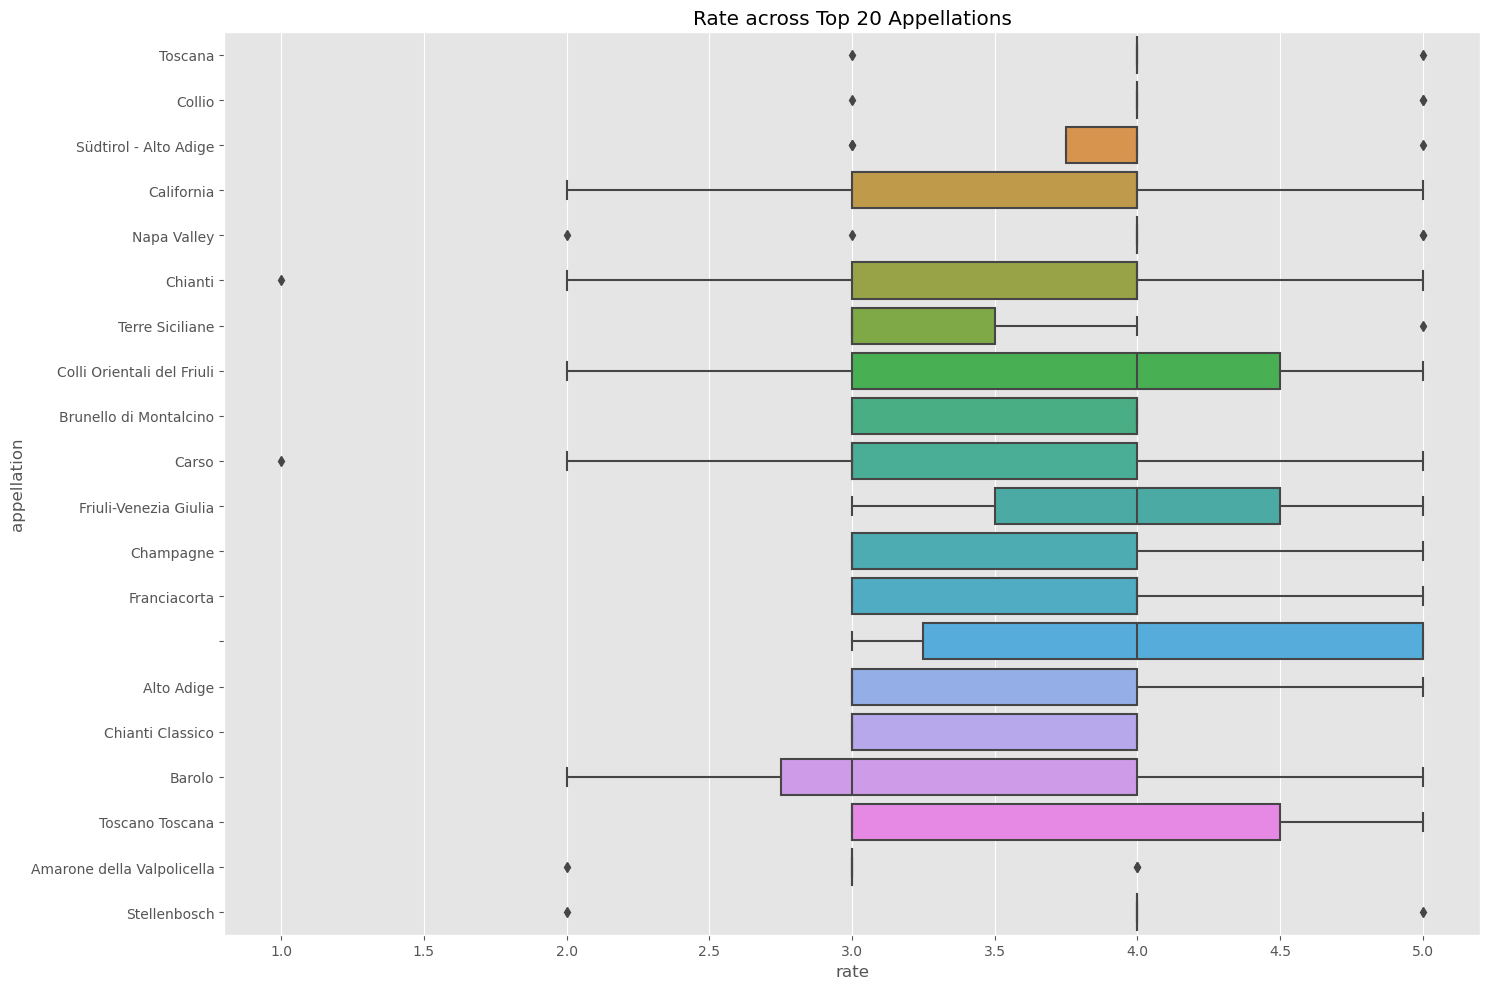

In [18]:
# Define the top 20 appellations
top_appellations = merged_df['appellation'].value_counts().index[:20].sort_values()

# Filter the DataFrame to include only these 'appellations'
df_top_appellations = merged_df[merged_df['appellation'].isin(top_appellations)]

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='rate', y='appellation', data=df_top_appellations)
plt.title('Rate across Top 20 Appellations')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/rate across top 20 appellations.png')
plt.show()

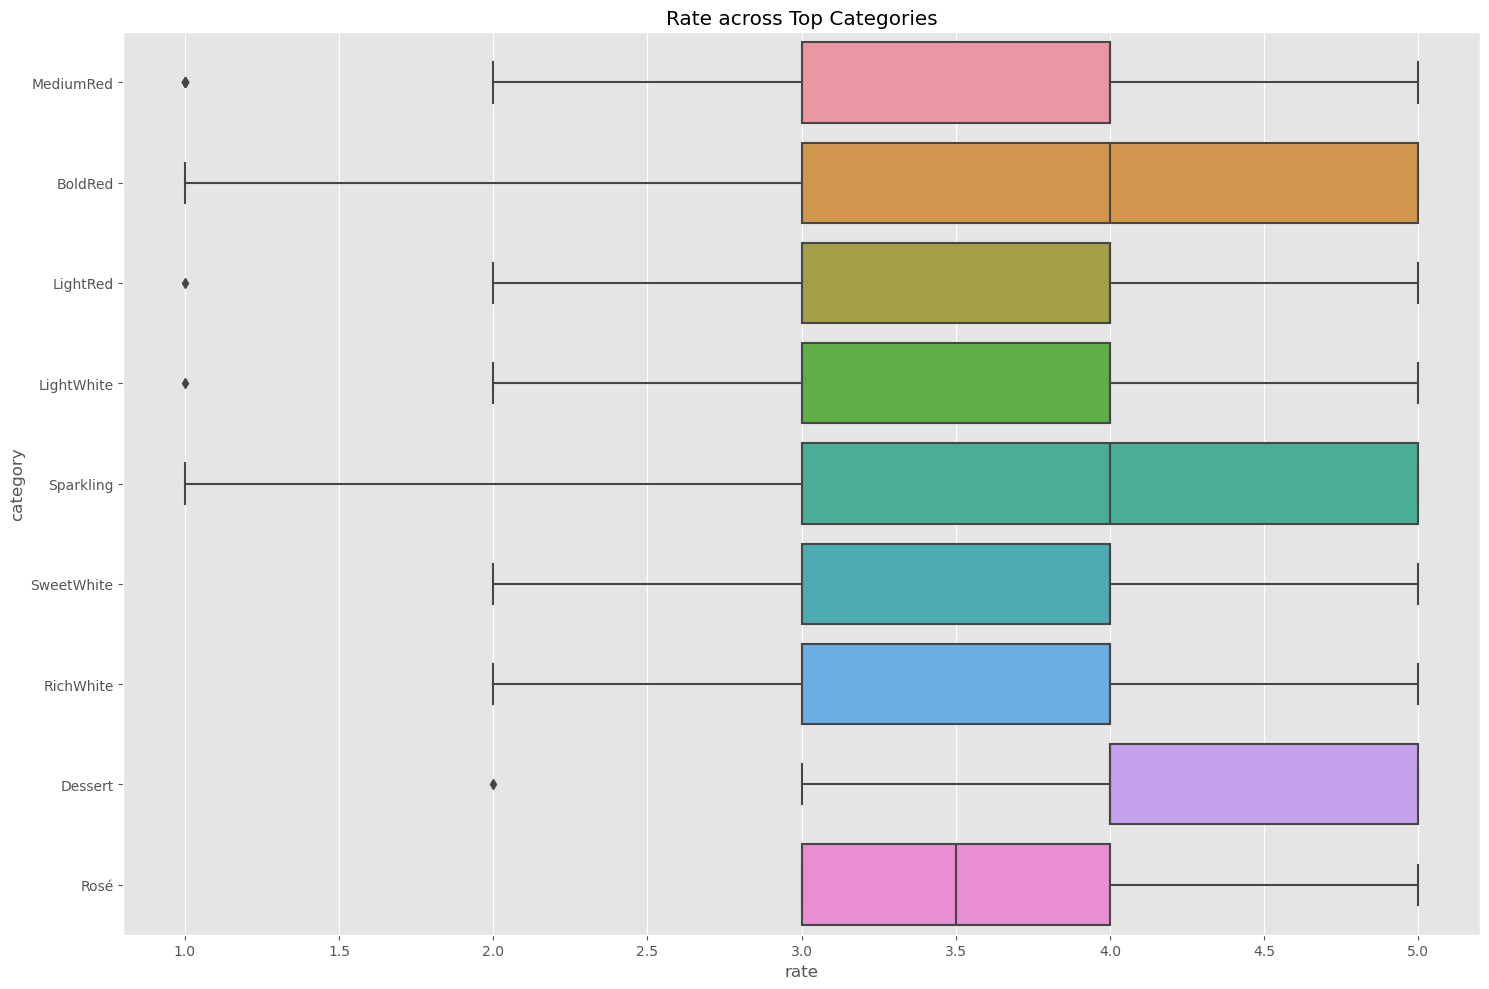

In [19]:
# Define the top 20 categories
top_categories = merged_df['category'].value_counts().index[:].sort_values()

# Filter the DataFrame to include only these 'categories'
df_top_categories = merged_df[merged_df['category'].isin(top_categories)]

# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='rate', y='category', data=df_top_categories)
plt.title('Rate across Top Categories')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/rate_across_top_categories.png')
plt.show()

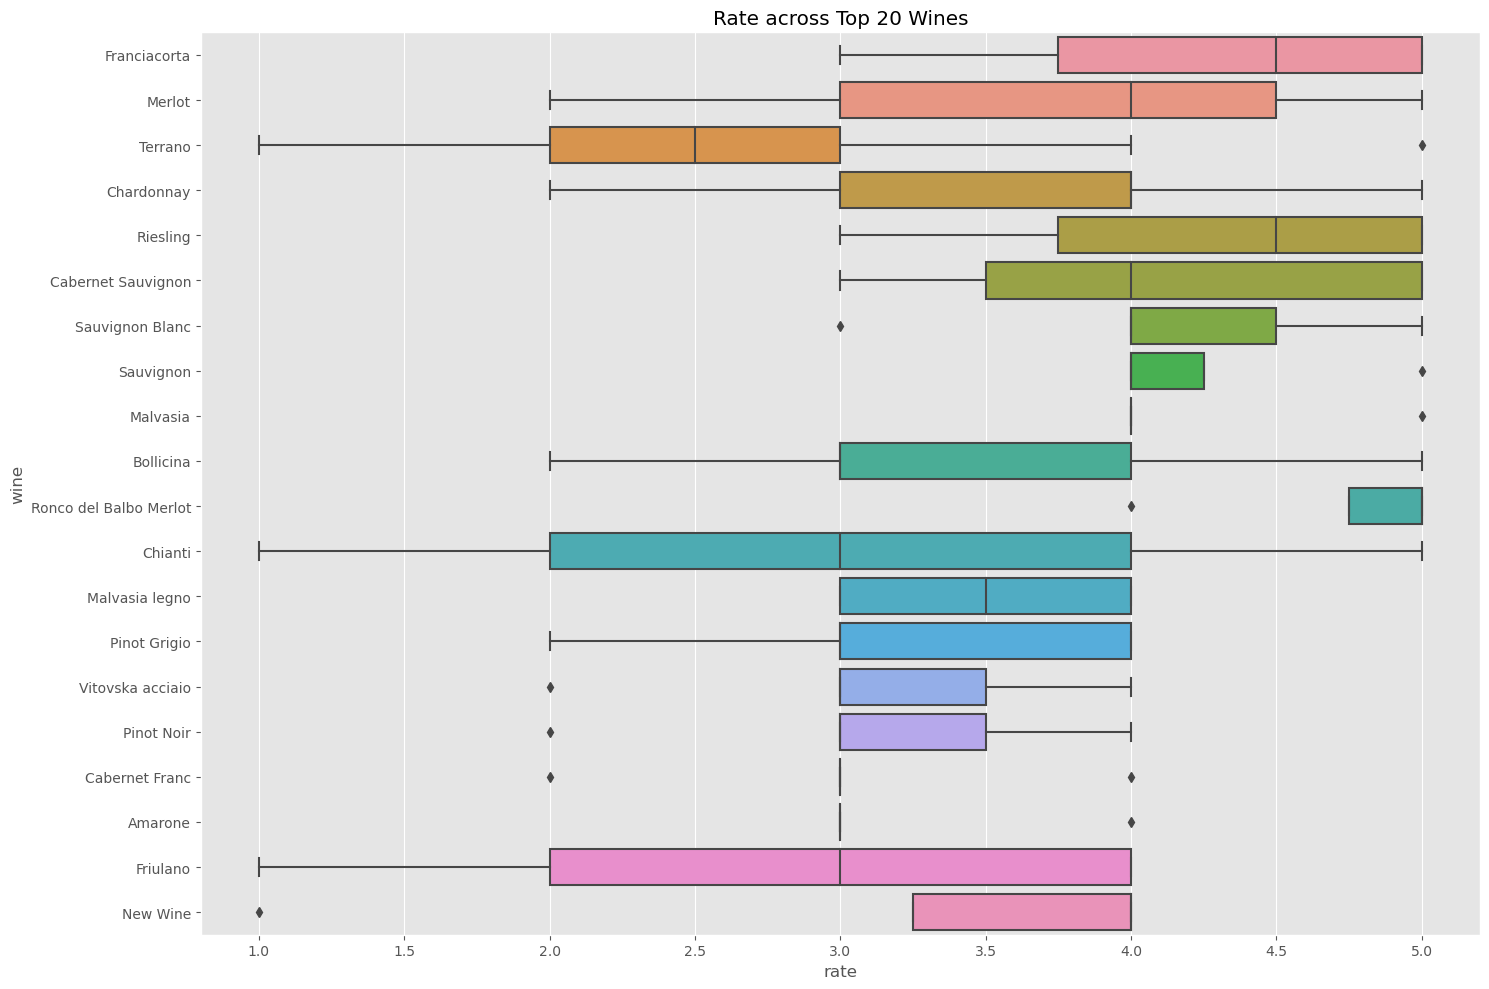

In [20]:
# Define the top 20 wines
top_wines = merged_df['wine'].value_counts().index[:20]

# Filter the DataFrame to include only these 'wines'
df_top_wines = merged_df[merged_df['wine'].isin(top_wines)]

# Sort the DataFrame by 'rate' in descending order
df_top_wines = df_top_wines.sort_values(by='rate', ascending=False)

# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='rate', y='wine', data=df_top_wines)
plt.title('Rate across Top 20 Wines')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/top_wines.png')
plt.show()

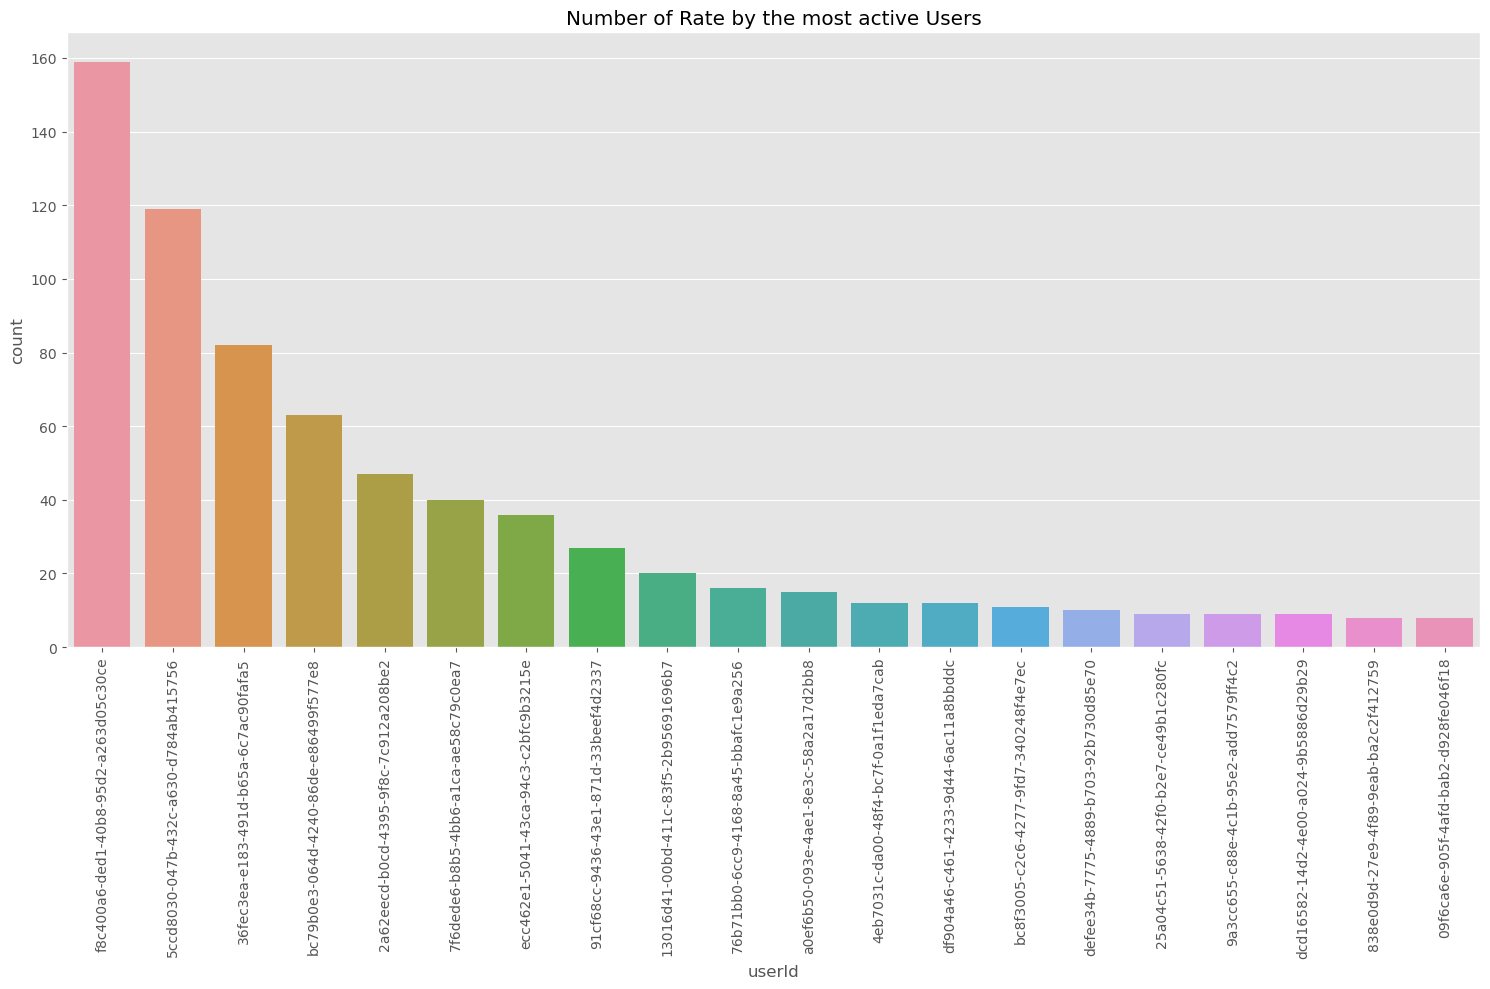

In [21]:
# The most active userIDs
plt.figure(figsize=(15, 10))
sns.countplot(x='userId', data=merged_df, order=merged_df['userId'].value_counts().index[:20])
plt.title('Number of Rate by the most active Users')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility of the userIDs
# Adjust the padding
plt.tight_layout()
# Save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/active_users.png')
plt.show()

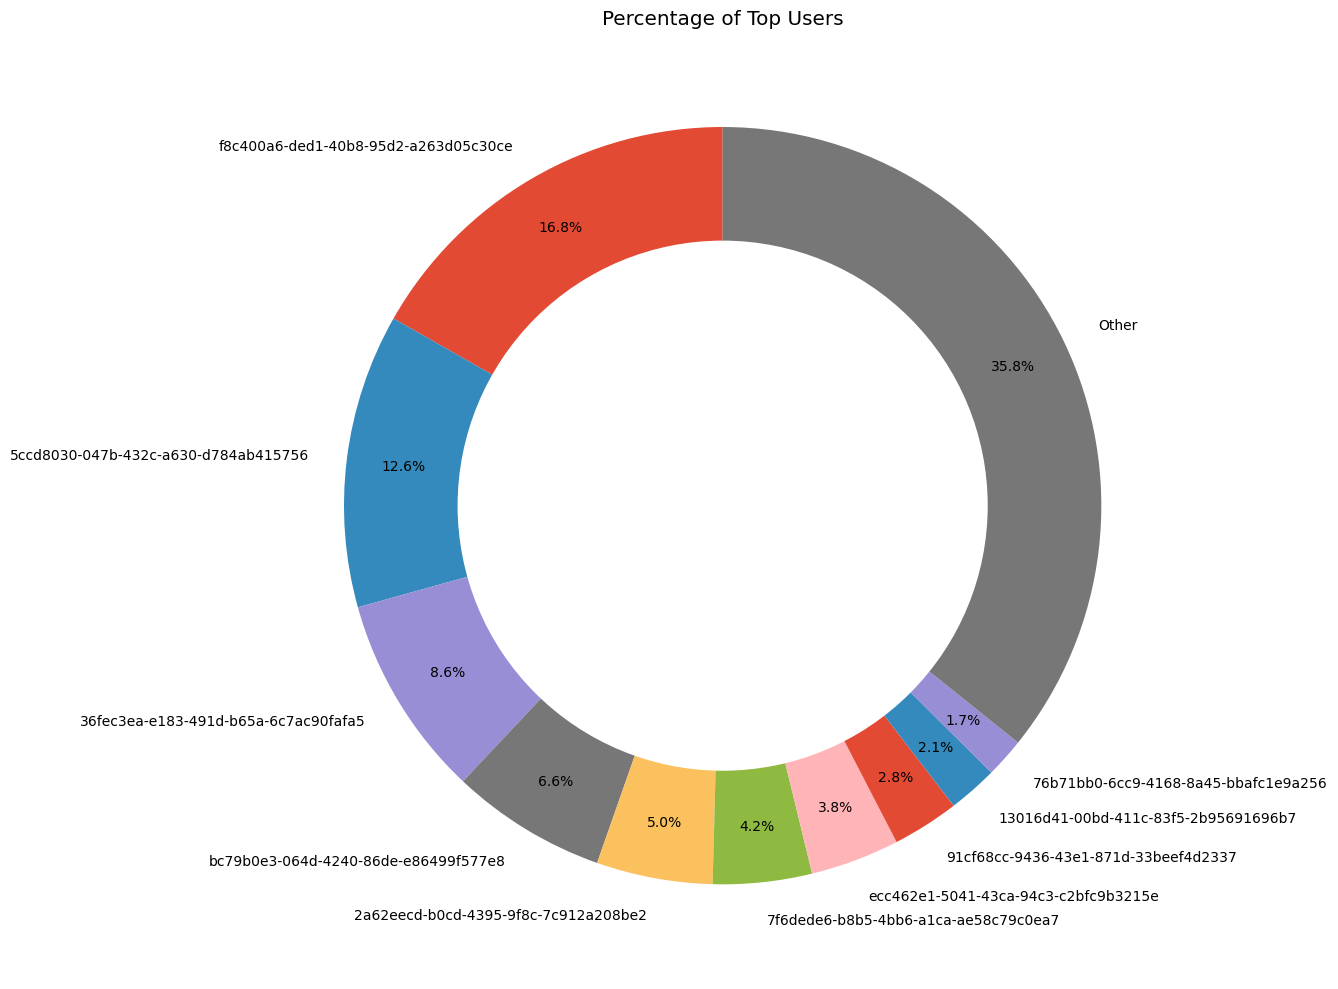

In [22]:
# Number of users to display
num_users = 10

# Minimum number of feedbacks to be included in the top users
min_feedbacks = 10

# Counts of each user
user_counts = merged_df['userId'].value_counts()

# Top users and the rest grouped into 'Other'
top_users = user_counts[:num_users]
top_users['Other'] = user_counts[user_counts < min_feedbacks].sum()

# Donut chart
plt.figure(figsize=(15, 10))
plt.pie(top_users, labels=top_users.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow=False)

# Circle at the center
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Top Users')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/top_users.png')
plt.show()

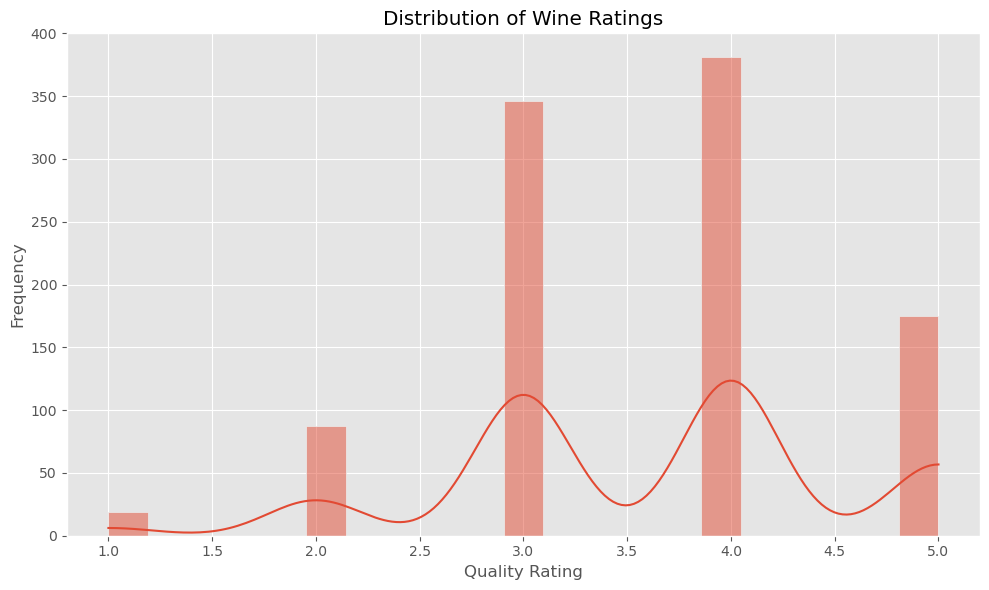

In [23]:
# Plot the distribution of wine ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rate'], kde=True)
plt.title('Distribution of Wine Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/ratings_distribution.png')
plt.show()

## Correlation


In [24]:
df_encoded = merged_df.copy()
# Convert all columns to strings
df_encoded = df_encoded.astype(str)

# Apply label encoding to each categorical column
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Calculate the correlation
correlation = df_encoded.corr()['rate'].sort_values(ascending=False)
print(correlation)
# the colors where mapped to:  
# 0: red
# 1: white
# 2: rose

rate           1.000000
vintage        0.116088
clarity        0.109080
sweetness      0.053763
depth          0.042066
color          0.030540
aromaKeys      0.028474
intensity      0.001264
acidity       -0.004614
appellation   -0.021199
wine          -0.027953
body          -0.042546
tannins       -0.044438
grapes        -0.046996
category      -0.067924
hue           -0.069702
userId        -0.203695
Name: rate, dtype: float64


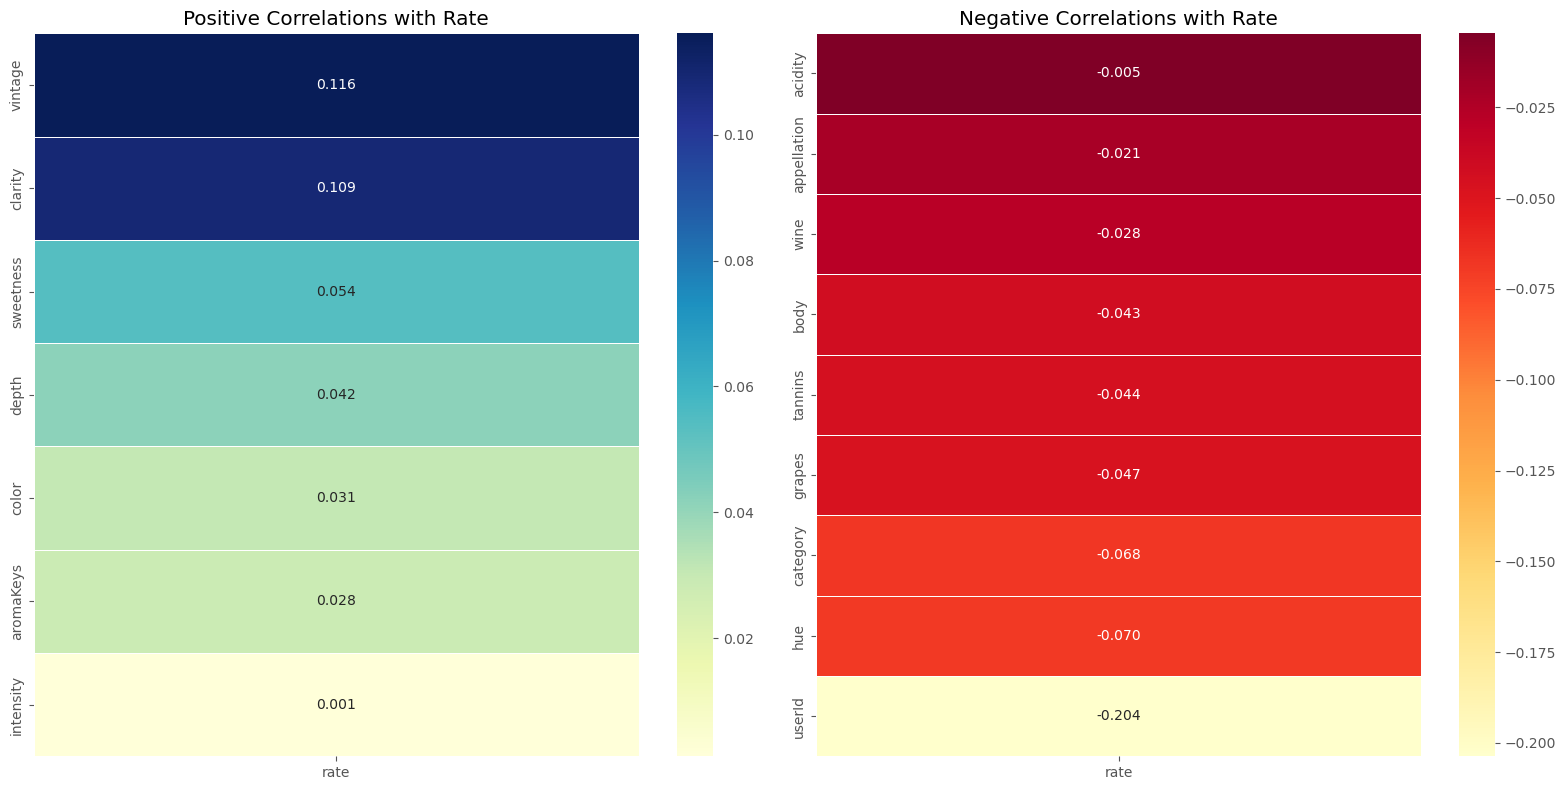

In [25]:
correlation = correlation.drop('rate')  # Exclude 'rate' from the plot

# Positive and negative correlations
positive_corr = correlation[correlation > 0]
negative_corr = correlation[correlation < 0]

# Separate heatmaps for positive and negative correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Positive Correlations
sns.heatmap(positive_corr.to_frame(), annot=True, cmap='YlGnBu', fmt=".3f", linewidths=.5, ax=ax1)
ax1.set_title('Positive Correlations with Rate')

# Negative Correlations
sns.heatmap(negative_corr.to_frame(), annot=True, cmap='YlOrRd', fmt=".3f", linewidths=.5, ax=ax2)
ax2.set_title('Negative Correlations with Rate')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/correlation.png')
plt.show()

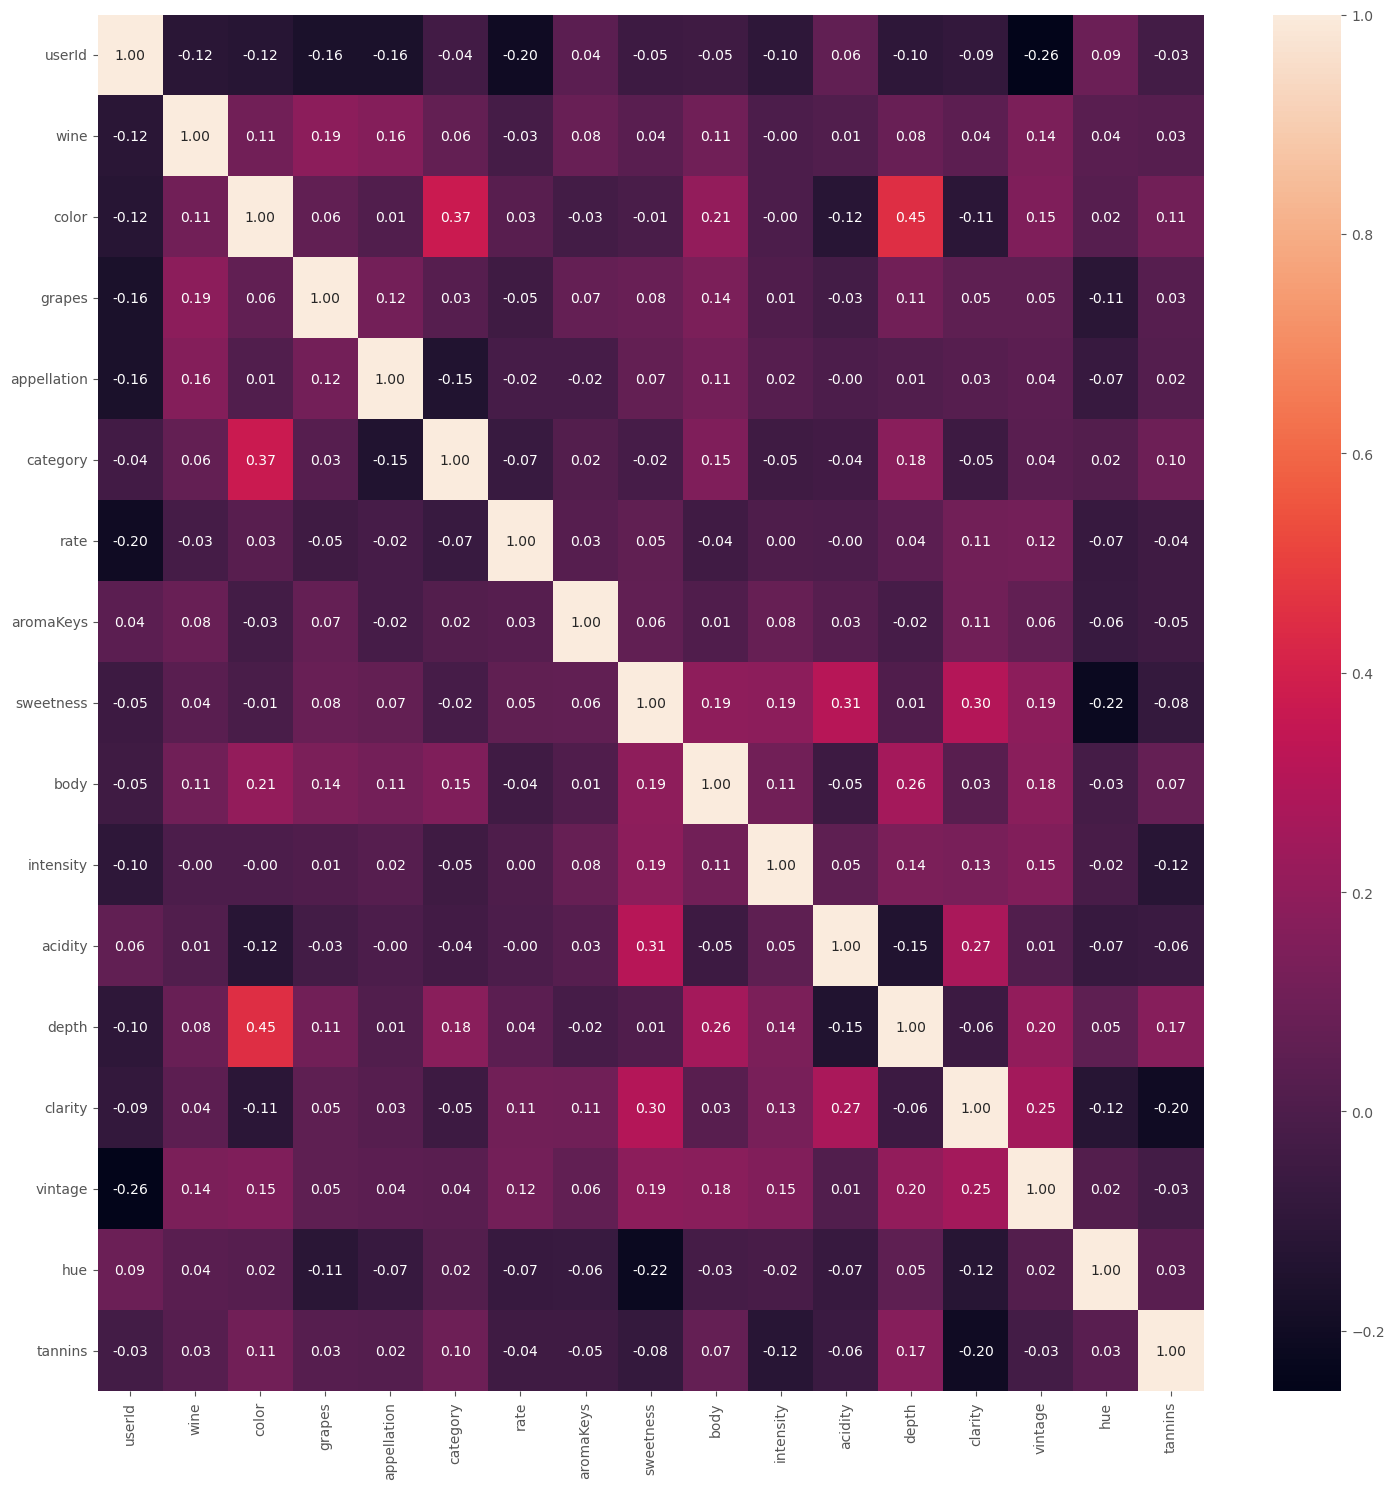

In [26]:
#Another heatmap
plt.figure(figsize=(15, 15))
# Heatmap
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/heatmapCorr.png')
# Show the plot
plt.show()